### Analyzing the trends of covid-19 - Sekhar Ch. Padhi

## Important Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
import plotly.express as px

##### The Plotly Python library is a free, open-source graphing library that allows users to create interactive, publication-quality graphs

In [3]:
df = pd.read_csv('covid_19_clean_complete.csv')

In [4]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


# EDA

In [5]:
# Analysis of null values
df.isnull().sum()

,0
Province/State,34404
Country/Region,0
Lat,0
Long,0
Date,0
Confirmed,0
Deaths,0
Recovered,0
Active,0
WHO Region,0


## **Inference**
#### The **'state' column** contains null values. However, removing these null values could result in data loss since some data collection is based on country-wise information. Given that our project also focuses on country-wise analysis, we will skip removing the null values here.

In [6]:
# Analysis of duplicate Values
df.duplicated().sum()

0

## **Inference**
#### it contains no Duplicate values

In [7]:
# Analysis of data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


## **Inference**
#### The date column is currently of the object data type and should be converted to datetime for proper date-time operations and analysis.

In [8]:
# Converting Date column into DateTime format
df['Date'] = pd.to_datetime(df['Date'])

In [9]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


### As we can see, the two columns contain the '/' character. Let's make it more readable.

In [10]:
df.rename(columns={'Province/State':'state','Country/Region':'country'},inplace= True)

In [11]:
df.head()

,state,country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


## **last day cases**

In [12]:

last_date = df[df['Date']==df['Date'].max()]

In [13]:
last_date.head()

,state,country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
48807,NaN,Afghanistan,33.93911,67.709953,2020-07-27,36263,1269,25198,9796,Eastern Mediterranean
48808,NaN,Albania,41.15330,20.168300,2020-07-27,4880,144,2745,1991,Europe
48809,NaN,Algeria,28.03390,1.659600,2020-07-27,27973,1163,18837,7973,Africa
48810,NaN,Andorra,42.50630,1.521800,2020-07-27,907,52,803,52,Europe
48811,NaN,Angola,-11.20270,17.873900,2020-07-27,950,41,242,667,Africa


## **Let's check the confirmed, recovered, active cases, and deaths for all COVID-19 patients.**

In [14]:
data = last_date.groupby('country')[['Confirmed', 'Active', 'Deaths', 'Recovered']].sum().reset_index()

In [15]:
data

,country,Confirmed,Active,Deaths,Recovered
0,Afghanistan,36263,9796,1269,25198
1,Albania,4880,1991,144,2745
2,Algeria,27973,7973,1163,18837
3,Andorra,907,52,52,803
4,Angola,950,667,41,242
...,...,...,...,...,...
182,West Bank and Gaza,10621,6791,78,3752
183,Western Sahara,10,1,1,8
184,Yemen,1691,375,483,833
185,Zambia,4552,1597,140,2815


In [16]:
#Max confirmed cases country
data.loc[data['Confirmed'].idxmax()]

,173
country,US
Confirmed,4290259
Active,2816444
Deaths,148011
Recovered,1325804


In [17]:
#least confirmed cases country
data.loc[data['Confirmed'].idxmin()]

,183
country,Western Sahara
Confirmed,10
Active,1
Deaths,1
Recovered,8


In [18]:
# max active cases country
data.loc[data['Active'].idxmax()]

,173
country,US
Confirmed,4290259
Active,2816444
Deaths,148011
Recovered,1325804


In [19]:
# least active cases country
data.loc[data['Active'].idxmin()]

,24
country,Brunei
Confirmed,141
Active,0
Deaths,3
Recovered,138


In [20]:
# Max deaths in country
data.loc[data['Deaths'].idxmax()]

,173
country,US
Confirmed,4290259
Active,2816444
Deaths,148011
Recovered,1325804


In [21]:
#least deaths recorded  country
data.loc[data['Deaths'].idxmin()]

,19
country,Bhutan
Confirmed,99
Active,13
Deaths,0
Recovered,86


In [22]:
fig  = px.choropleth(data,locations='country',locationmode='country names',
                    color='Deaths',hover_name='country',range_color=[1,data['Deaths'].max()],
                     color_continuous_scale='Viridis',title='country wise death cases')
fig.show()

In [23]:
fig = px.choropleth(data,locations='country',locationmode='country names',
                    color='Active',hover_name= 'country',range_color=[1,df['Active'].max()],
                    color_continuous_scale='peach',title='country wise active cases')
fig.show()

In [24]:
fig = px.choropleth(data,locations='country',locationmode='country names',
                    color='Recovered',hover_name = 'country',range_color=[1,df['Recovered'].max()],
                    color_continuous_scale='Greens',title='country wise recovered cases')
fig.show()

In [25]:
fig = px.choropleth(data,locations='country',locationmode='country names',
                    color='Confirmed',hover_name = 'country',range_color=[1,df['Confirmed'].max()],
                    color_continuous_scale='OrRd',title='country wise recovered cases')
fig.show()

### **Confirmed COVID-19 cases date wise.**

In [26]:
con_10 = df.groupby('Date')['Confirmed'].sum().reset_index()

In [27]:
con_10

,Date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


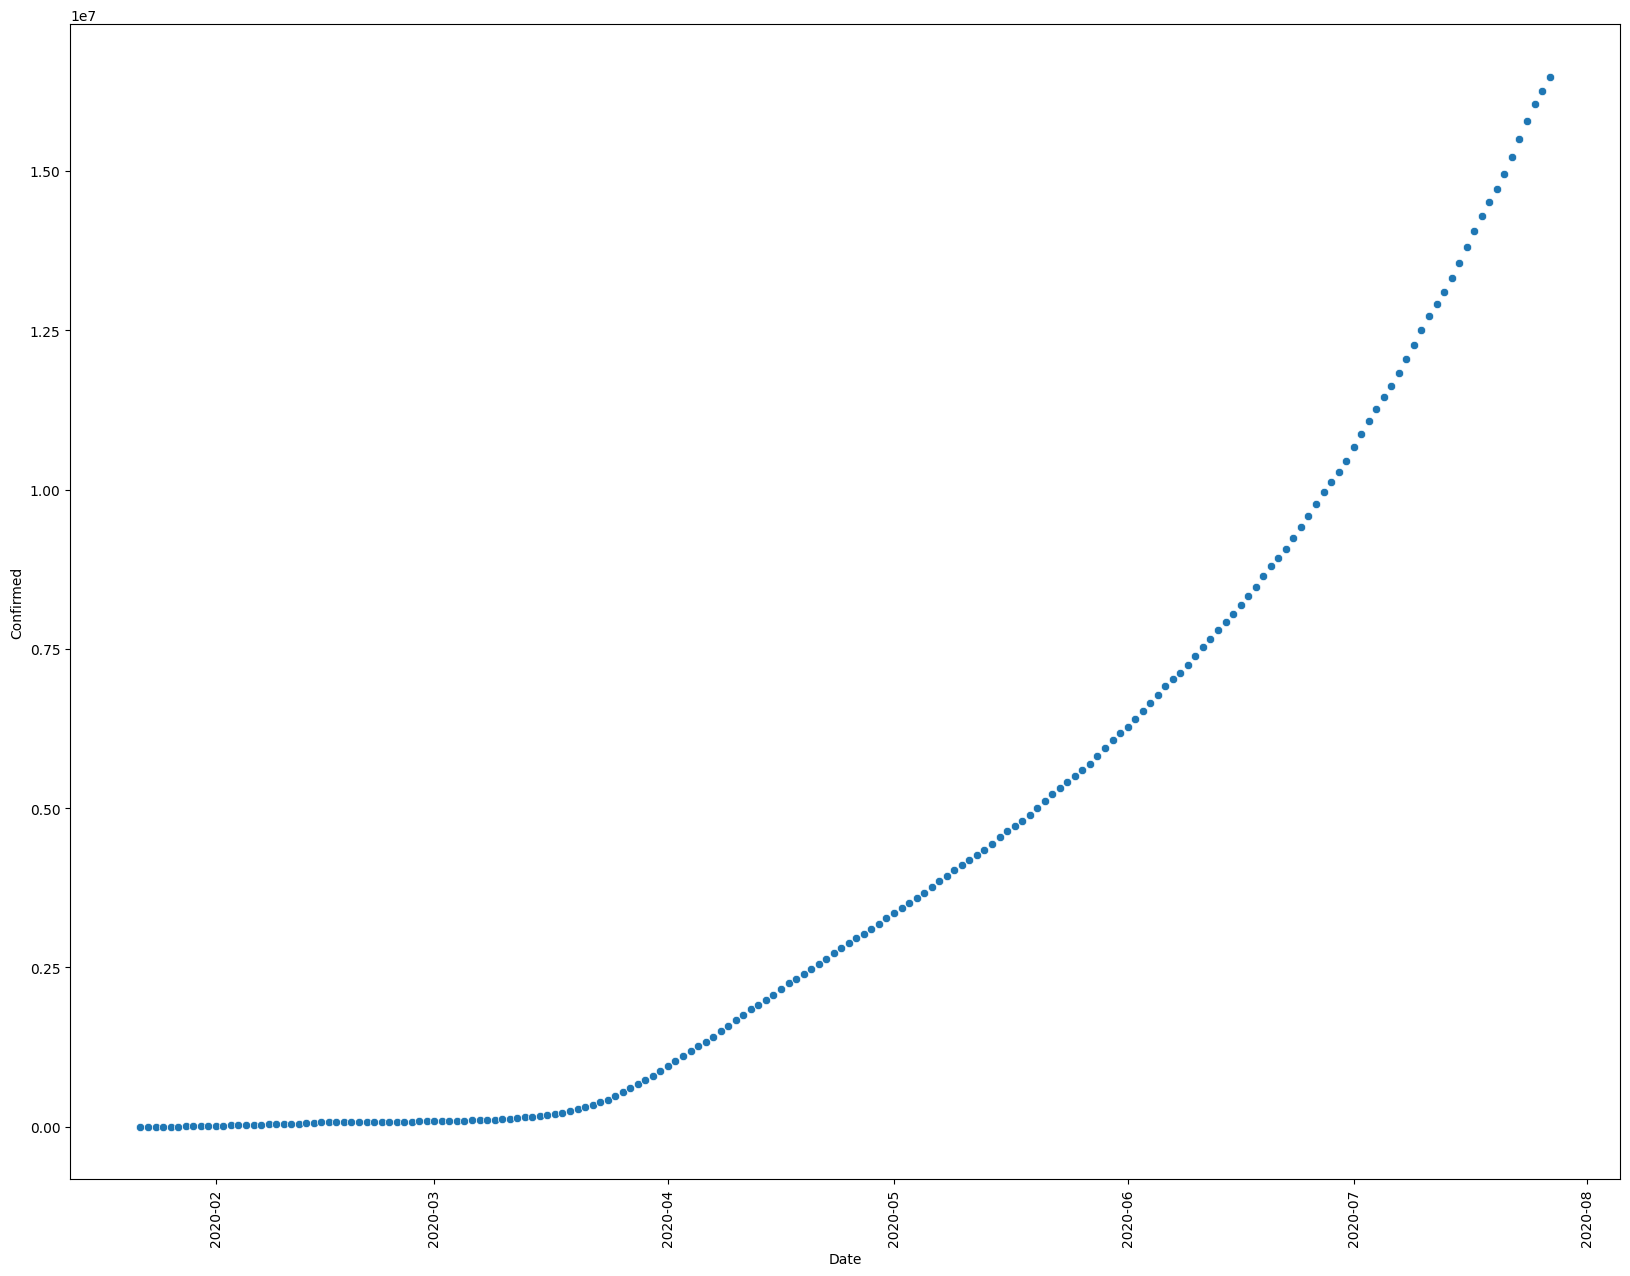

In [28]:
#visulization
plt.figure(figsize=(20,15))
sns.scatterplot(x='Date',y='Confirmed',data=con_10)
plt.xticks(rotation=90)
plt.show()

### **Top 10 countries with the highest Active COVID-19 cases.**

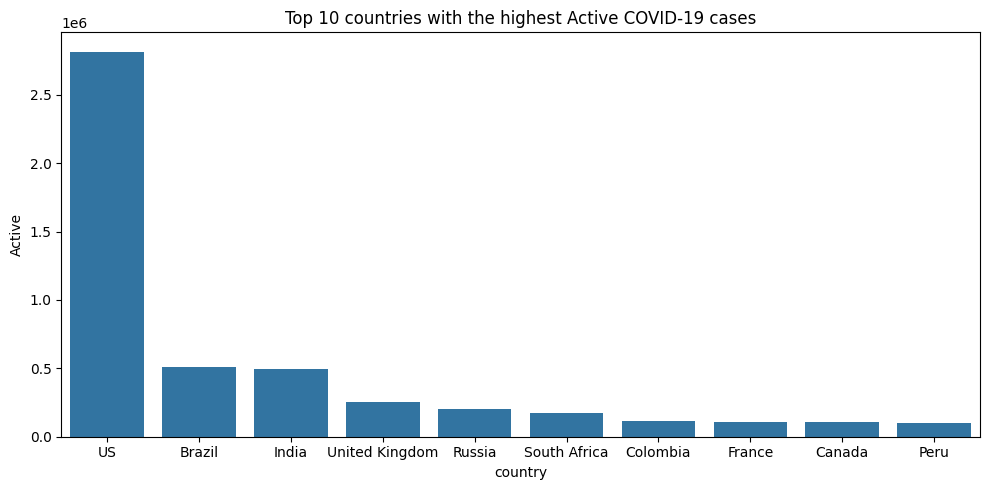

In [29]:
plt.figure(figsize=(10,5))
sns.barplot(x='country',y='Active',data=data.sort_values(by='Active',ascending=False).head(10))
plt.title('Top 10 countries with the highest Active COVID-19 cases')
plt.xlabel('country')
plt.ylabel('Active')
plt.tight_layout()
plt.show()

### **Based on the analysis, the U.S. has the highest number of active COVID-19 cases, followed by Brazil in second place and India in third.**

# **What is the Facebook Prophet?**

## Facebook Prophet is an open-source Python library offering an intuitive, automated approach to capturing trends, seasons and exceptional events in time series.

# **We will use the Facebook Prophet library to analyze this dataset's time series, including trends, patterns, and seasonality.**

In [30]:
# future prediction of of confirmed cases
confirmed = df.groupby('Date')['Confirmed'].sum().reset_index()

In [31]:
confirmed.head()

,Date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118


In [32]:
from prophet import Prophet

### ** in Prophet ,Dataframe must have columns "ds" and "y" with the dates and values respectively.**

In [33]:
confirmed.columns = ['ds','y']
confirmed['ds'] = pd.to_datetime(confirmed['ds'])

In [34]:
confirmed.head()

,ds,y
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118


# **Model Building**

In [35]:
model = Prophet()
model.fit(confirmed)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4u52ao7z/kgjubsop.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4u52ao7z/q0pzv5cv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23262', 'data', 'file=/tmp/tmp4u52ao7z/kgjubsop.json', 'init=/tmp/tmp4u52ao7z/q0pzv5cv.json', 'output', 'file=/tmp/tmp4u52ao7z/prophet_modely_10vknq/prophet_model-20241220082803.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:28:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:28:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [36]:
future_pred = model.make_future_dataframe(periods=30)

In [37]:
future_pred

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26
...,...
213,2020-08-22
214,2020-08-23
215,2020-08-24
216,2020-08-25


In [38]:
forecast = model.predict(future_pred)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
213,2020-08-22,2.145056e+07,2.109185e+07,2.182702e+07
214,2020-08-23,2.164810e+07,2.129297e+07,2.204367e+07
215,2020-08-24,2.184268e+07,2.141636e+07,2.226886e+07
216,2020-08-25,2.203193e+07,2.160206e+07,2.245486e+07
217,2020-08-26,2.224170e+07,2.177980e+07,2.268995e+07


* **ds:** This column represents the dates for which the forecast was made. It's the same as the 'ds' column in the input data you provided to the Prophet model.
* **yhat**: This is the most important column – it contains the predicted values of your time series for each date in 'ds'. It's the model's best estimate of what the value will be.
* **yhat_lower:** This column provides the lower bound of the uncertainty interval for the forecast. It essentially says, "with a certain level of confidence (usually 80% by default), we think the actual value will be above this."
* **yhat_upper:** This column provides the upper bound of the uncertainty interval. Similar to yhat_lower, it says, "with a certain level of confidence, we think the actual value will be below this."

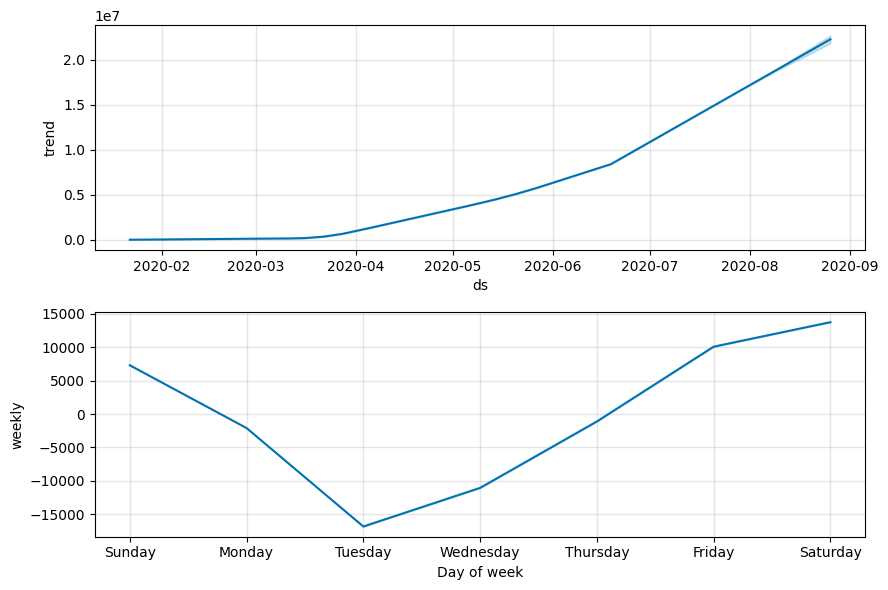

In [39]:
# components analysis
confirmed_plot = model.plot_components(forecast)

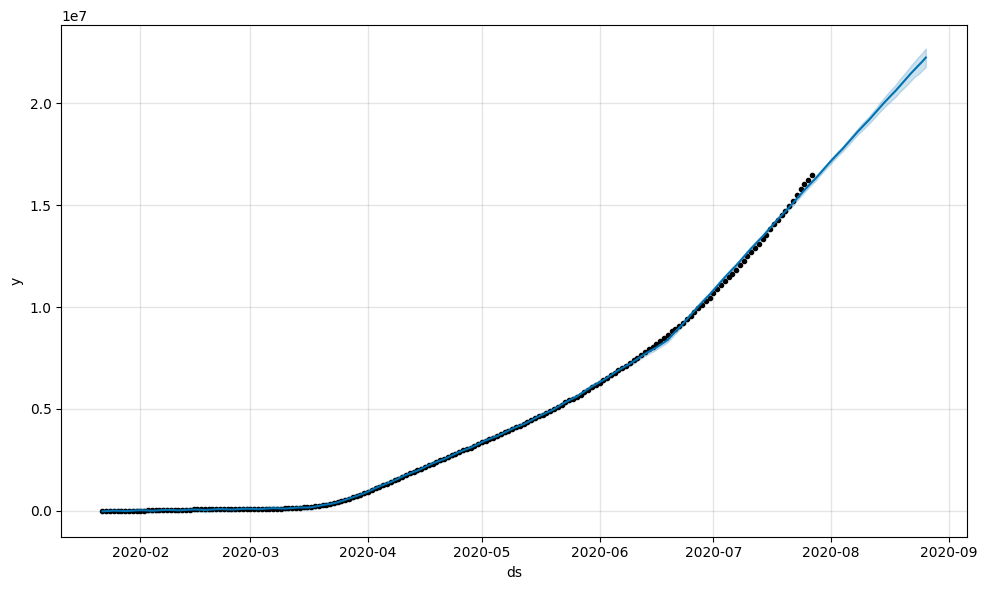

In [40]:
#visualization
confirmed_plot = model.plot(forecast)